## **Causality - Hey, we have Machine Learning, so why even bother?**

## History

* Aristotle: 4 types of causes (material, formal, efficient, and final);
* David Hume's interpretation:
  * movement/apearance of object A **precedes** of object B;
  * experience that in a sufficient number of time -> we develop a **feeling of expectation**;
  * that's is about feeling we develop, not about the world!
* This has high resemblance to psychology's **conditioning**, which relies on a common foundation: **association**;
* Most ML algos nowdays are **associative learning**.

## Why Causality?

* Watch human babies interact with the world: make use of **associative learning**, but also **experiment**;
* In context of Causal Inference, it's **intervention**, the core of **randomized controlled trial** or **RCT**.

### Confounding

> A confounder influences 2 or more other phenomena and produces a **spurious** association between them.

* Predict people drowning on ice cream sales?;
* Adding to many *predictors* are both harmful for **statistical learning** and **causal learning** pov;
* Temparature is *confounder* in this case.

In [ ]:
from itertools import combinations
from scipy import stats

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

Let `a` is number of people drowning, `c` is ice cream sales, and `b` is observation of temprature:

In [ ]:
# for reproductibility
np.random.seed(45)

# `b` represents our confounder
b = np.random.rand(100)

# `a` and `c` are causaully independent of each other, but they are both children of `b`
a = b + 0.1 * np.random.rand(100)
c = b + 0.3 * np.random.rand(100)

`a` and `c` are highly correlated:

In [4]:
# checking correlation between `a` and `c`
coef, p_val = stats.pearsonr(a, c)

print(coef)

0.962749762529751


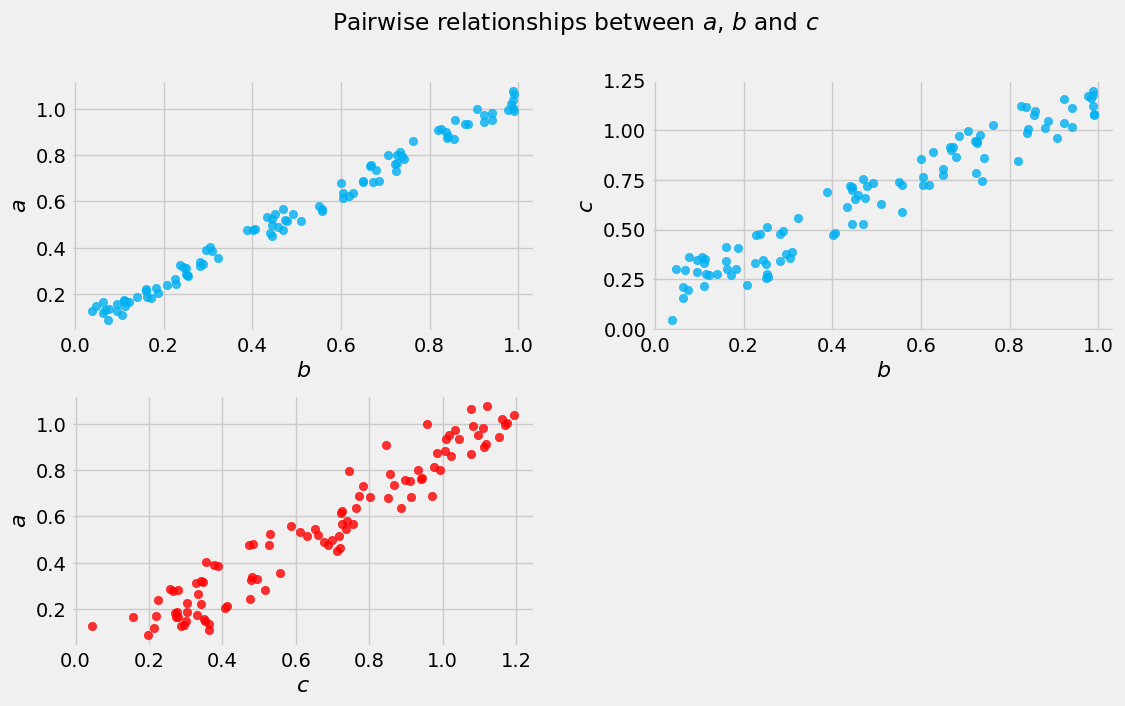

In [5]:
variables = {"a": a, "b": b, "c": c}
COLORS = ["#00B0F0", "#FF0000"]

plt.figure(figsize=(12, 7))

for i, (var_1, var_2) in enumerate([("b", "a"), ("b", "c"), ("c", "a")]):
    color = COLORS[1]

    if "b" in [var_1, var_2]:
        color = COLORS[0]

    plt.subplot(2, 2, i + 1)
    plt.scatter(variables[var_1], variables[var_2], alpha=0.8, color=color)

    plt.xlabel(f"${var_1}$", fontsize=16)
    plt.ylabel(f"${var_2}$", fontsize=16)

plt.suptitle("Pairwise relationships between $a$, $b$ and $c$")
plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

We can still make useful prediction of `a` on `c` (because of high correlation), so why do we should care about relationship is causal or not?

## Not to lose monney and human lives

### Marketer's dilemna

A **diff-in-diff** model:

treating effect = outcome of treatment group - outcome of non-treatment group

But we need to know what a person will response under treatment and no-treatment, which is infact not visible. To solve this, we need **counterfactuals**.

### Let's play doctor

* **Simpson paradox** (aka **Yule-Simpson** effect): behaviour changes when partitioning the data;
* Which partitioning is the correct one: feature selection by CV, feature importance, etc;
* This work well for prediction, if we want more, we need **causal world model**.

In [9]:
import pandas as pd

blood_clots_data = pd.read_csv("../data/ch_01_drug_data.csv")

blood_clots_data

,Drug,A,A.1,B,B.1
0,Clot,1,0,1,0
1,Female,24,56,17,25
2,Male,3,39,6,74
3,Total,27,95,23,99


> Data can not answer the question by itself (observation), we need experiment!